In [15]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

class simple_plot :
    def __init__(self, df_obs,df_pred, xlabel = None, ylabel = None):
        self.df_obs = df_obs
        self.df_pred = df_pred
        self.obs = df_obs.values
        self.pred = df_pred.values
        self.xlabel = df_obs.name
        self.ylabel = df_pred.name
        self.ymin = min (np.amin(self.pred), np.amin(self.obs))
        self.ymax = max (np.amax(self.pred), np.amax(self.obs))
        self.yrange = self.ymax - self.ymin
        self.fig = None
        self.RMSE = None
        self.R2 = None
        self.label_message = None
        self.xlabel = self.df_obs.name
        self.ylabel = self.df_pred.name
        
    def update_range(self,df_obs, df_pred):
        if (self.ymax < np.amax(df_pred.values)):
            self.ymax = np.amax(df_pred.values)
            
        if (self.ymin > np.amin(df_pred.values)):
            self.ymin = np.amin(df_pred.values)
        self.yrange = self.ymax - self.ymin
    
    def report_max (self):
        return self.ymax
    def report_min (self):
        return self.ymin
    
    def plot (self, energy_max, energy_min):
        self.fig = plt.figure(figsize=(8, 8))
        self.yrange = energy_max - energy_min
        xmin = energy_min - self.yrange * 0.01
        xmax = energy_max + self.yrange * 0.01
        ymin = energy_min- self.yrange * 0.01
        ymax = energy_max + self.yrange * 0.01
        plt.plot([xmin, xmax], 
                 [ymin, ymax])

        plt.xlim(xmin,xmax)

        plt.ylim(ymin,ymax)
        self.RMSE = np.sqrt(mean_squared_error(self.df_obs, self.df_pred))
        self.R2 = r2_score(self.df_obs, self.df_pred)
        self.label_message = ("RMSE : " + str (round(self.RMSE, 5))
                  +"\nR2      : "+ str(round(self.R2, 5)))
        
        plt.scatter(self.obs, self.pred, label=self.label_message)
        plt.legend(fontsize=12, loc='upper left')

        plt.xlabel(self.xlabel, fontsize=24)
        plt.ylabel(self.ylabel, fontsize=24)
        plt.title('Observed-Predicted Plot', fontsize=24)
        plt.tick_params(labelsize=16)
        plt.grid()
        self.fig.show()
    

-32.576747999999995 -1068.7285


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


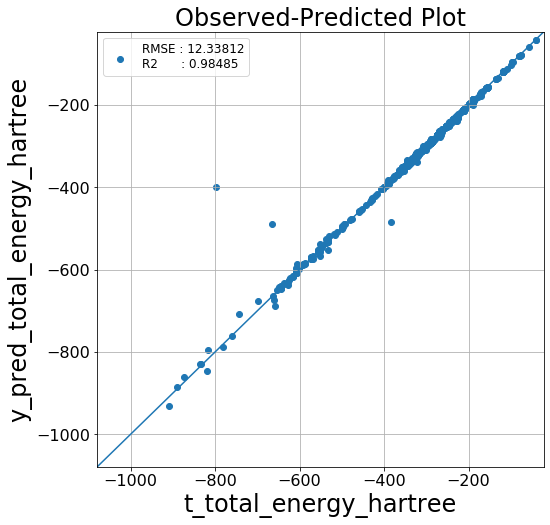

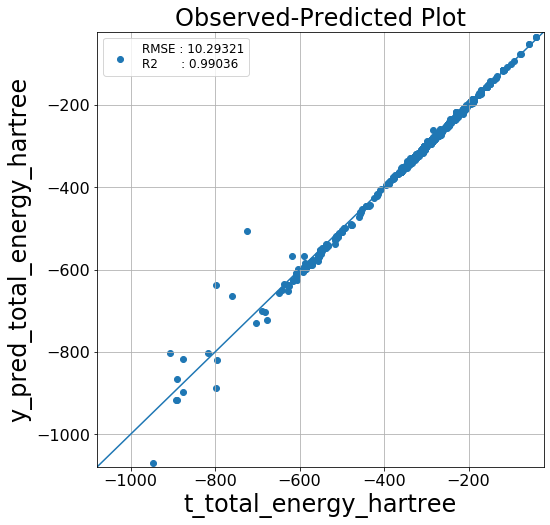

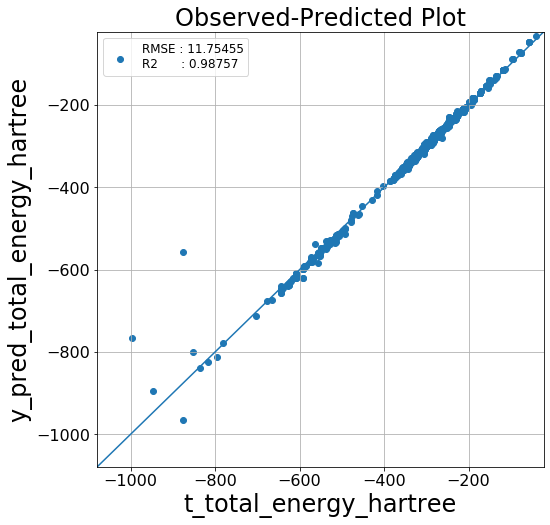

In [16]:
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_nfp_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_nfp_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_nfp_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_total_energy_hartree"
pred_column_name = "y_pred_total_energy_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_max = max(energy_loewest_plot1.report_max(),
                 energy_loewest_plot2.report_max(),
                 energy_loewest_plot3.report_max())
energy_min = min(energy_loewest_plot1.report_min(),
                 energy_loewest_plot2.report_min(),
                 energy_loewest_plot3.report_min())
print(energy_max, energy_min)
energy_loewest_plot1.plot(energy_max, energy_min)
energy_loewest_plot2.plot(energy_max, energy_min)
energy_loewest_plot3.plot(energy_max, energy_min)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


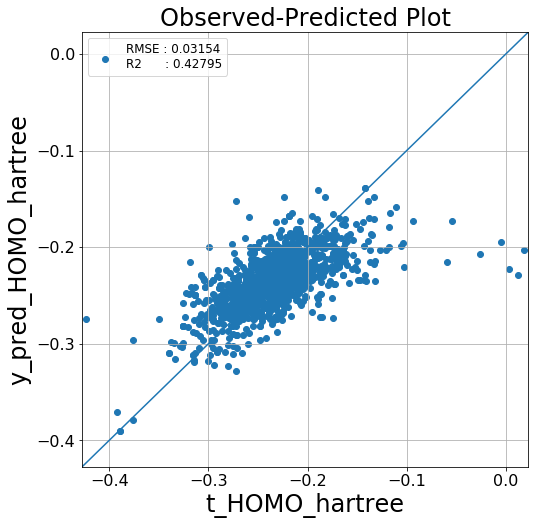

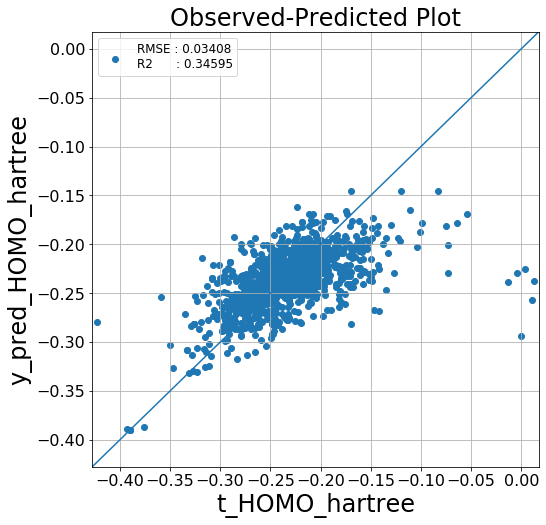

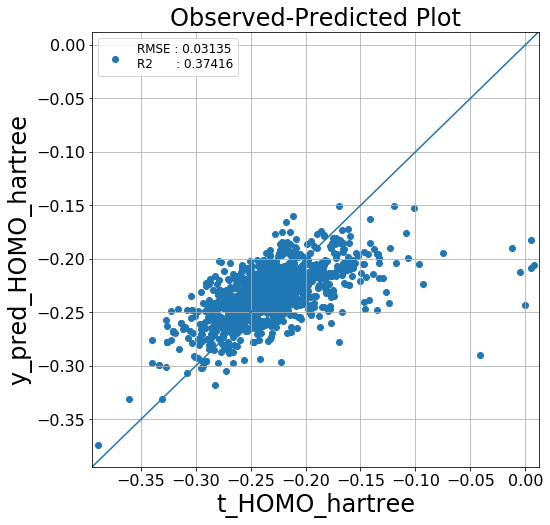

In [3]:
filepath = "/Users/user/programs/result_gcnn/eval_HOMO_hartree_lowest_nfp_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_HOMO_hartree_lowest_nfp_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_HOMO_hartree_lowest_nfp_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_HOMO_hartree"
pred_column_name = "y_pred_HOMO_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


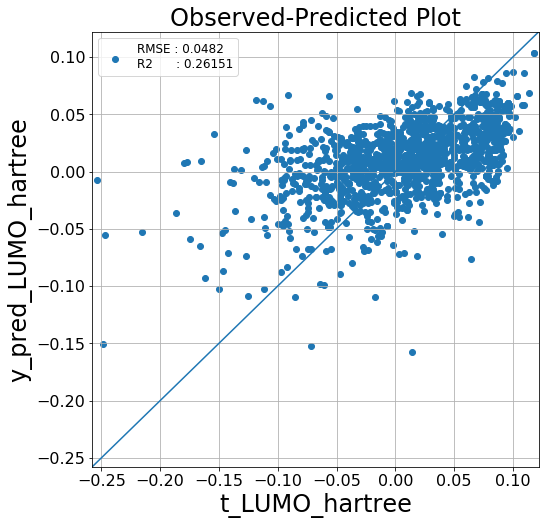

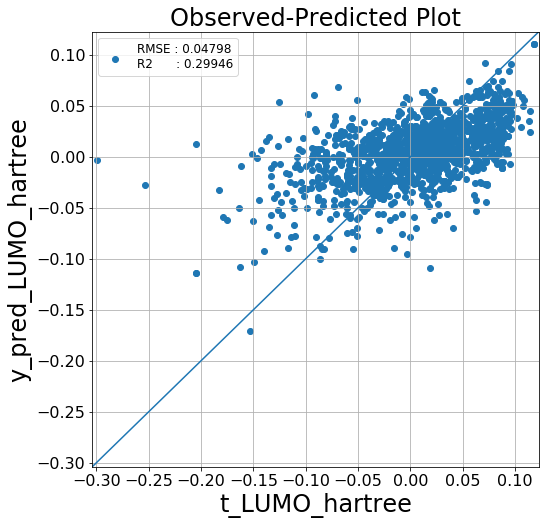

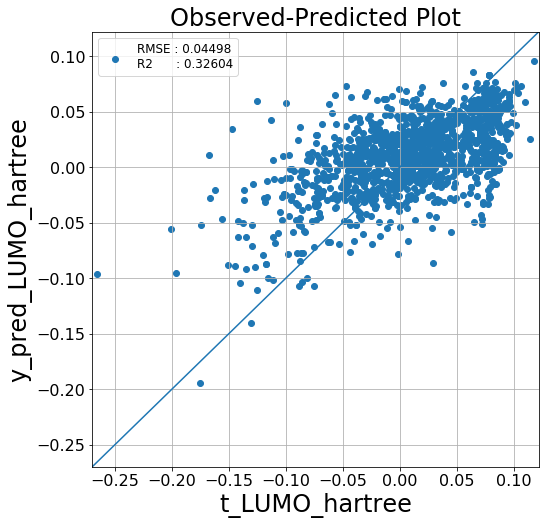

In [4]:
filepath = "/Users/user/programs/result_gcnn/eval_LUMO_hartree_lowest_nfp_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_LUMO_hartree_lowest_nfp_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_LUMO_hartree_lowest_nfp_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_LUMO_hartree"
pred_column_name = "y_pred_LUMO_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


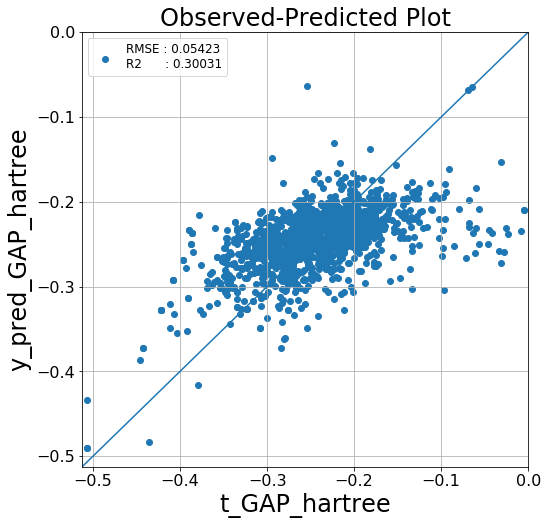

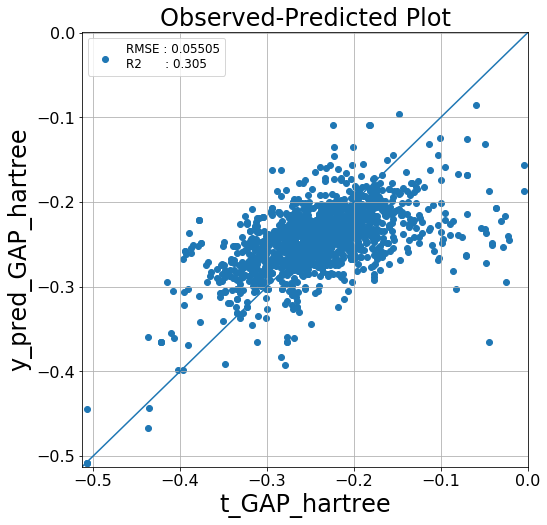

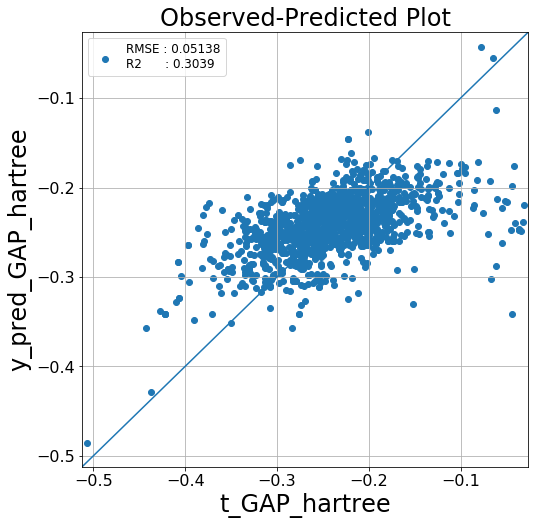

In [5]:
filepath = "/Users/user/programs/result_gcnn/eval_GAP_hartree_lowest_nfp_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_GAP_hartree_lowest_nfp_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_GAP_hartree_lowest_nfp_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_GAP_hartree"
pred_column_name = "y_pred_GAP_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


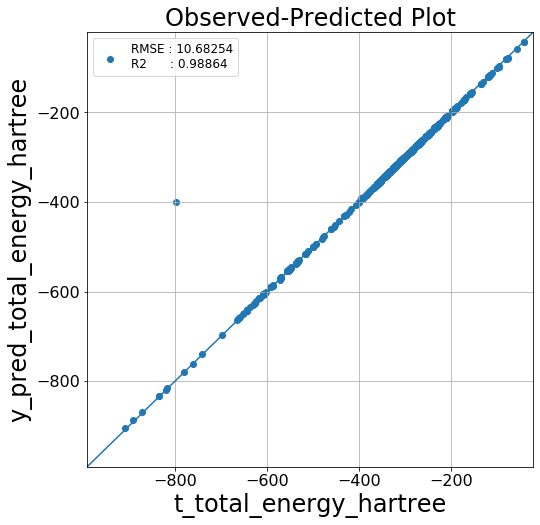

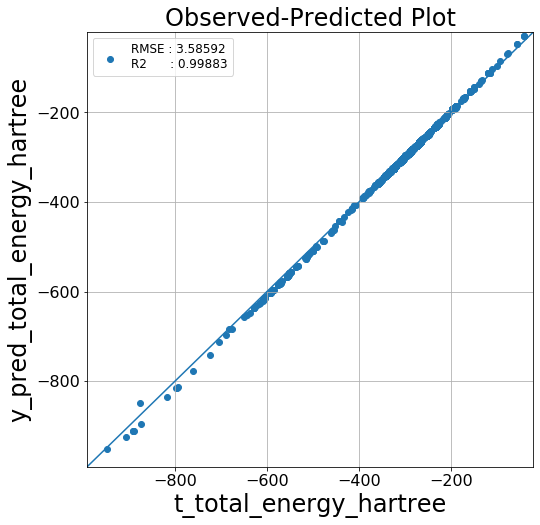

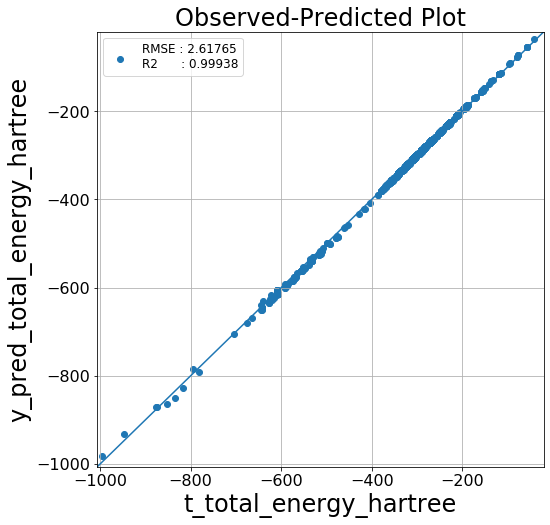

In [6]:
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_ggnn_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_ggnn_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_ggnn_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_total_energy_hartree"
pred_column_name = "y_pred_total_energy_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


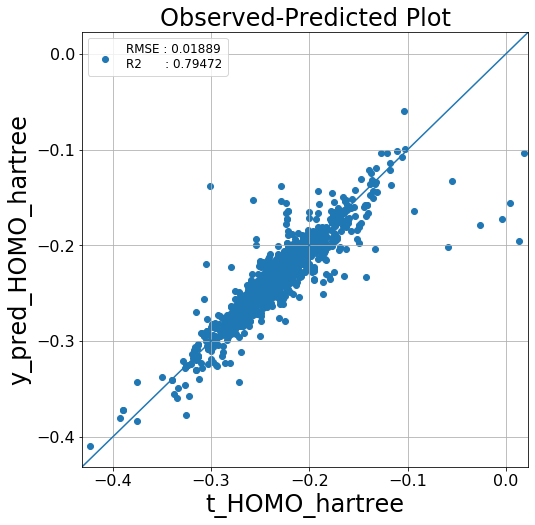

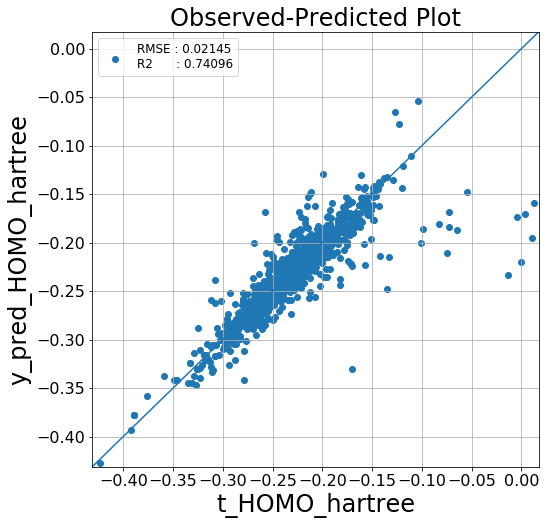

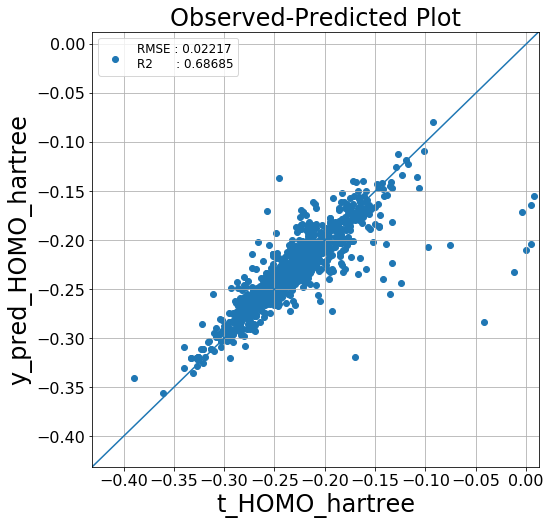

In [7]:
filepath = "/Users/user/programs/result_gcnn/eval_HOMO_hartree_lowest_ggnn_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_HOMO_hartree_lowest_ggnn_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_HOMO_hartree_lowest_ggnn_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_HOMO_hartree"
pred_column_name = "y_pred_HOMO_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


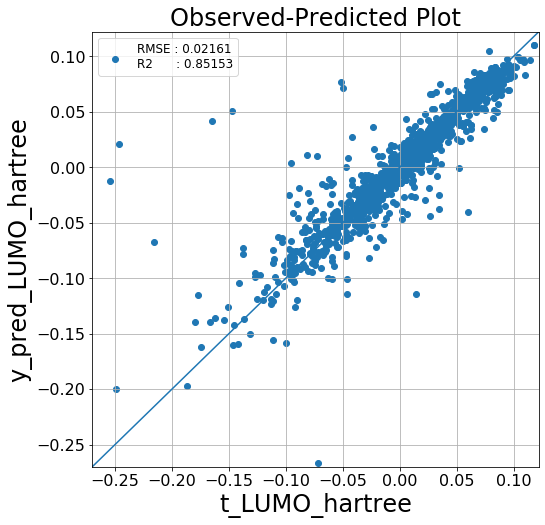

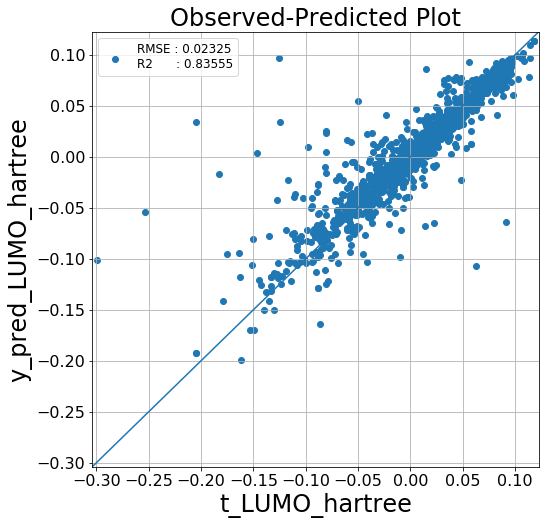

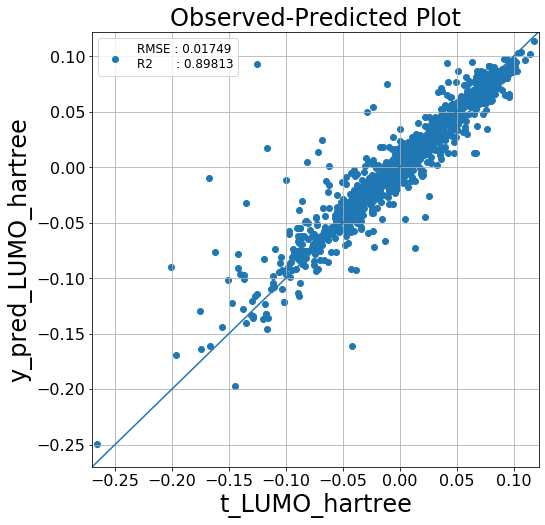

In [8]:
filepath = "/Users/user/programs/result_gcnn/eval_LUMO_hartree_lowest_ggnn_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_LUMO_hartree_lowest_ggnn_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_LUMO_hartree_lowest_ggnn_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_LUMO_hartree"
pred_column_name = "y_pred_LUMO_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


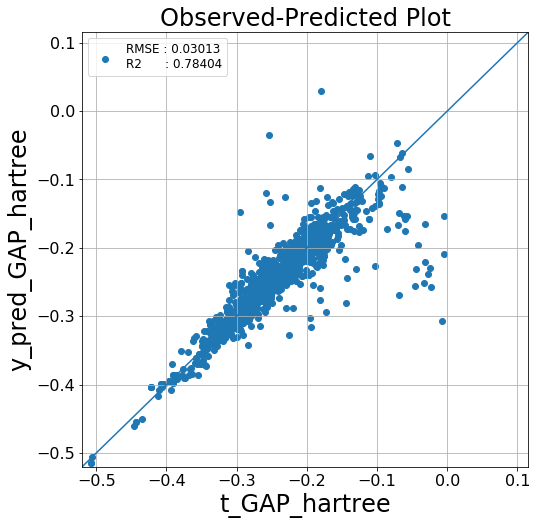

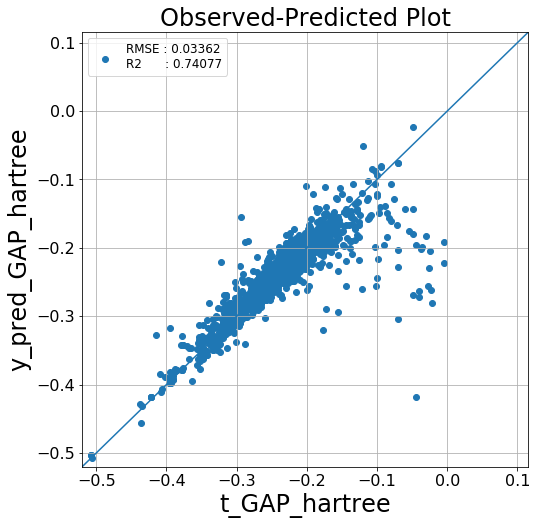

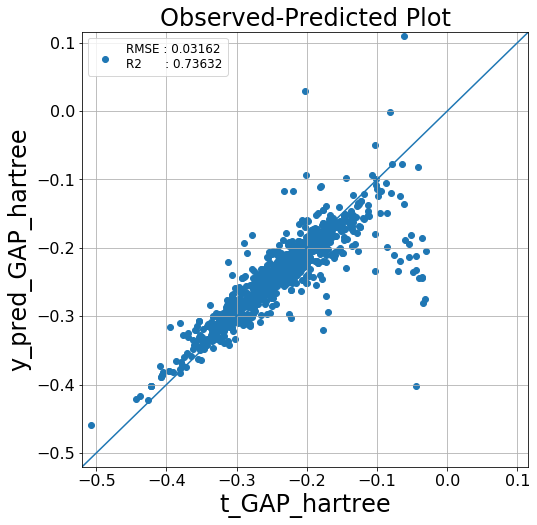

In [9]:
filepath = "/Users/user/programs/result_gcnn/eval_GAP_hartree_lowest_ggnn_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_GAP_hartree_lowest_ggnn_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_GAP_hartree_lowest_ggnn_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_GAP_hartree"
pred_column_name = "y_pred_GAP_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


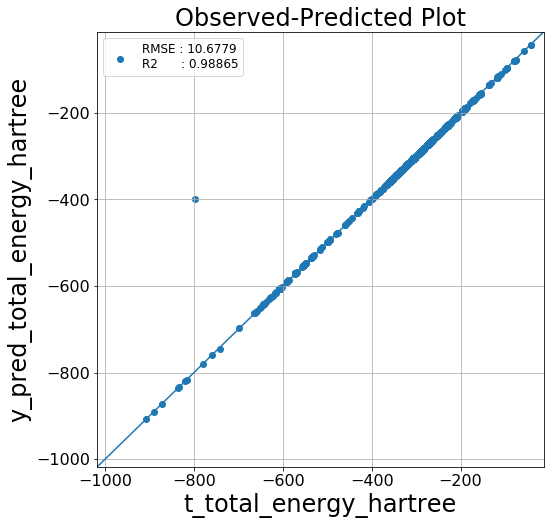

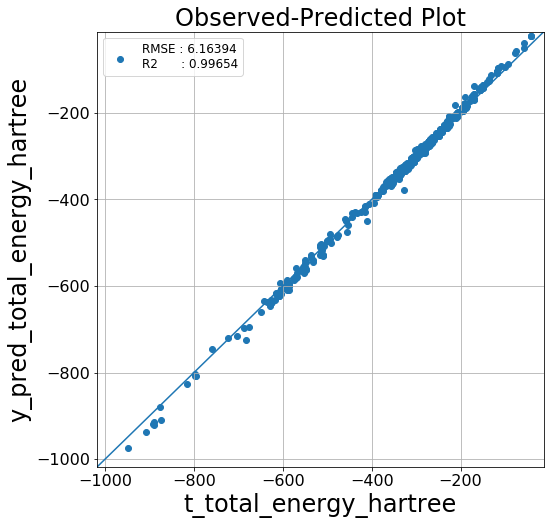

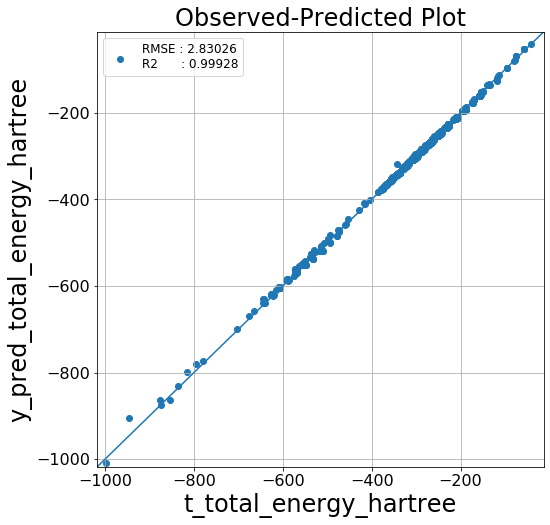

In [10]:
filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_weavenet_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_weavenet_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_total_energy_hartree_lowest_weavenet_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_total_energy_hartree"
pred_column_name = "y_pred_total_energy_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


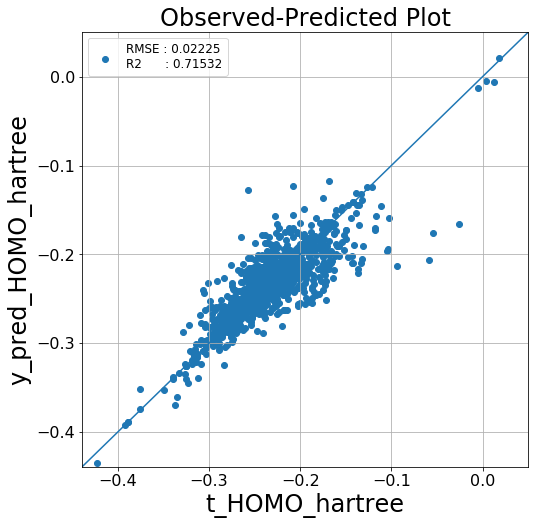

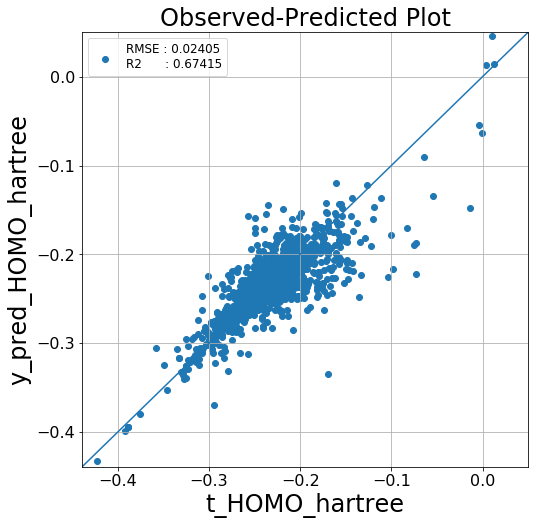

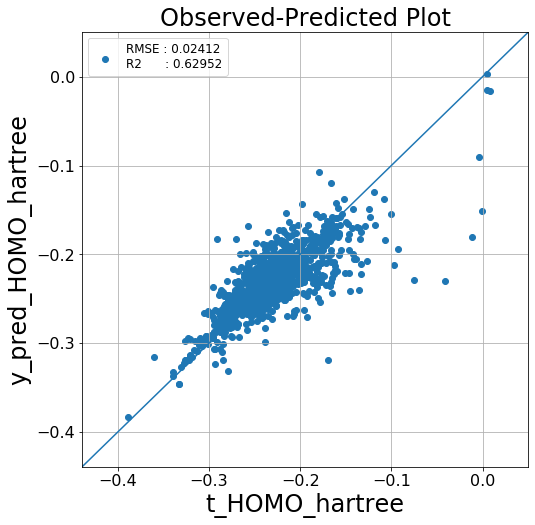

In [11]:
filepath = "/Users/user/programs/result_gcnn/eval_HOMO_hartree_lowest_weavenet_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_HOMO_hartree_lowest_weavenet_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_HOMO_hartree_lowest_weavenet_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_HOMO_hartree"
pred_column_name = "y_pred_HOMO_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


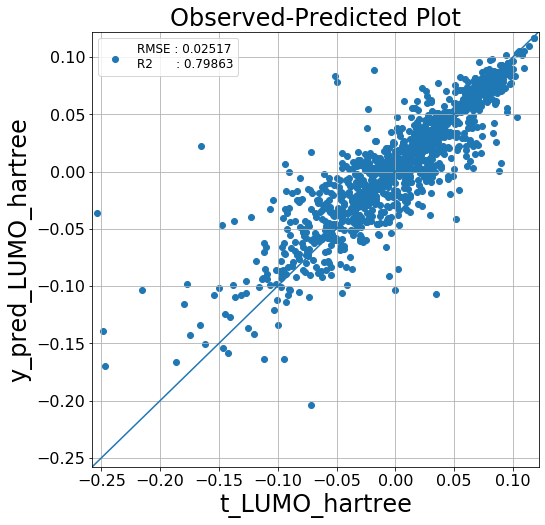

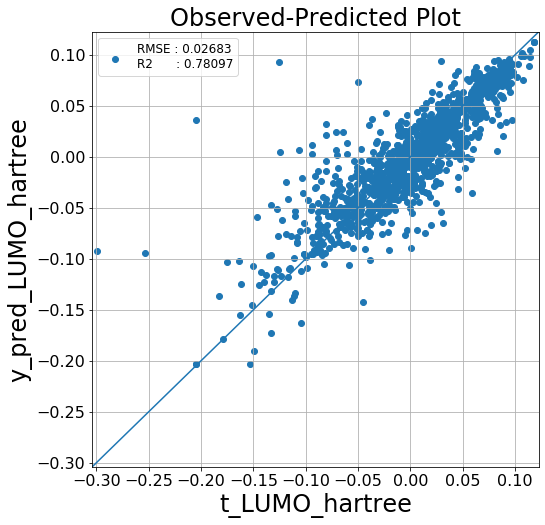

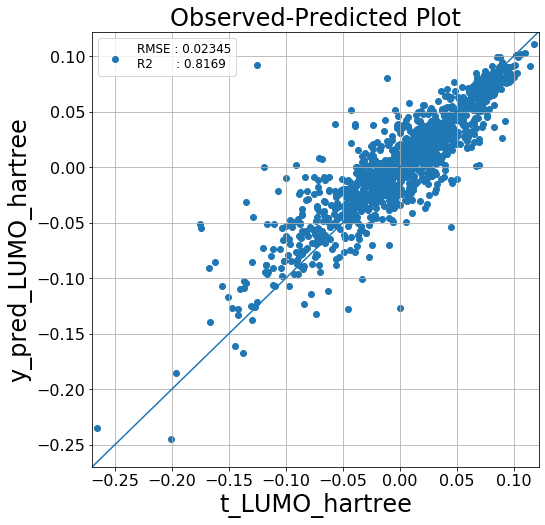

In [12]:
filepath = "/Users/user/programs/result_gcnn/eval_LUMO_hartree_lowest_weavenet_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_LUMO_hartree_lowest_weavenet_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_LUMO_hartree_lowest_weavenet_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_LUMO_hartree"
pred_column_name = "y_pred_LUMO_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


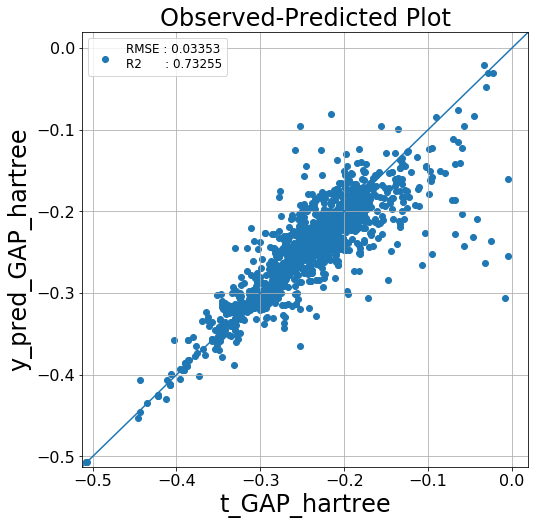

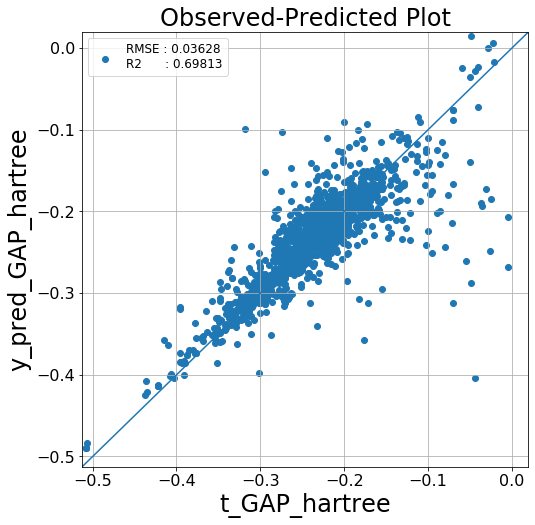

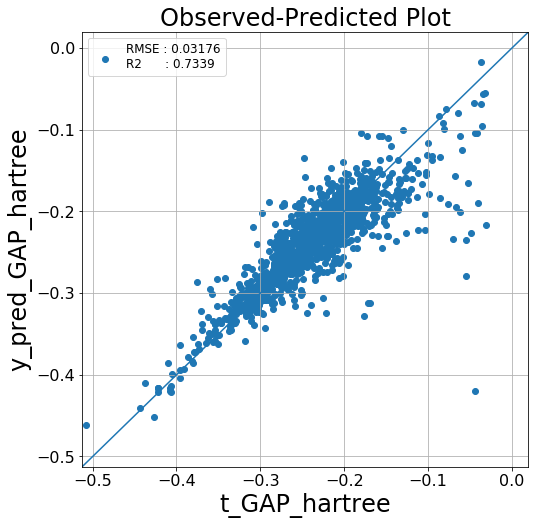

In [13]:
filepath = "/Users/user/programs/result_gcnn/eval_GAP_hartree_lowest_weavenet_0_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df1 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_GAP_hartree_lowest_weavenet_1_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df2 = pd.read_csv (filepath)

filepath = "/Users/user/programs/result_gcnn/eval_GAP_hartree_lowest_weavenet_2_2000epoch/pred_result.csv"
filename = os.path.basename(filepath)
df3 = pd.read_csv (filepath)

obs_column_name = "t_GAP_hartree"
pred_column_name = "y_pred_GAP_hartree"
energy_loewest_plot1 = simple_plot (df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot1.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot1.plot()

energy_loewest_plot2 = simple_plot (df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot2.update_range(df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot2.plot()

energy_loewest_plot3 = simple_plot (df_obs = df3[obs_column_name], df_pred = df3[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df2[obs_column_name], df_pred = df2[pred_column_name] )
energy_loewest_plot3.update_range(df_obs = df1[obs_column_name], df_pred = df1[pred_column_name] )
energy_loewest_plot3.plot()